In [9]:
# testing wafer pose estimation by using marker array
import cv2
import numpy as np
from matplotlib import pyplot as plt

WAFER_MARKER_MAP = {
1:(-40.0,140.0),    2:(-20.0,140.0),    3:(0.0,140.0),      4:(20.0,140.0),     5:(40.0,140.0),  
6:(-80.0,120.0),    7:(-60.0,120.0),    8:(-40.0,120.0),    9:(-20.0,120.0),    10:(0.0,120.0),     11:(20.0,120.0),    12:(40.0,120.0),    13:(60.0,120.0),    14:(80.0,120.0),   
15:(-100.0,100.0),  16:(-80.0,100.0),   17:(-60.0,100.0),   18:(-40.0,100.0),   19:(-20.0,100.0),   20:(0.0,100.0),     21:(20.0,100.0),    22:(40.0,100.0),    23:(60.0,100.0),    24:(80.0,100.0),    25:(100.0,100.0),   
26:(-120.0,80.0),   27:(-100.0,80.0),   28:(-80.0,80.0),    29:(-60.0,80.0),    30:(-40.0,80.0),    31:(-20.0,80.0),    32:(0.0,80.0),      33:(20.0,80.0),     34:(40.0,80.0),     35:(60.0,80.0),     36:(80.0,80.0),     37:(100.0,80.0),    38:(120.0,80.0),
39:(-120.0,60.0),   40:(-100.0,60.0),   41:(-80.0,60.0),    42:(-60.0,60.0),    43:(-40.0,60.0),    44:(-20.0,60.0),    45:(0.0,60.0),      46:(20.0,60.0),     47:(40.0,60.0),     48:(60.0,60.0),     49:(80.0,60.0),     50:(100.0,60.0),    51:(120.0,60.0),   
52:(-140.0,40.0),   53:(-120.0,40.0),   54:(-100.0,40.0),   55:(-80.0,40.0),    56:(-60.0,40.0),    57:(-40.0,40.0),    58:(-20.0,40.0),    59:(0.0,40.0),      60:(20.0,40.0),     61:(40.0,40.0),     62:(60.0,40.0),     63:(80.0,40.0),     64:(100.0,40.0),    65:(120.0,40.0),    66:(140.0,40.0),
67:(-140.0,20.0),   68:(-120.0,20.0),   69:(-100.0,20.0),   70:(-80.0,20.0),    71:(-60.0,20.0),    72:(-40.0,20.0),    73:(-20.0,20.0),    74:(0.0,20.0),      75:(20.0,20.0),     76:(40.0,20.0),     77:(60.0,20.0),     78:(80.0,20.0),     79:(100.0,20.0),    80:(120.0,20.0),    81:(140.0,20.0),
82:(-140.0,0.0),    83:(-120.0,0.0),    84:(-100.0,0.0),    85:(-80.0,0.0),     86:(-60.0,0.0),     87:(-40.0,0.0),     88:(-20.0,0.0),     89:(0.0,0.0),       90:(20.0,0.0),      91:(40.0,0.0),      92:(60.0,0.0),      93:(80.0,0.0),      94:(100.0,0.0),     95:(120.0,0.0),     96:(140.0,0.0),
97:(-140.0,-20.0),  98:(-120.0,-20.0),  99:(-100.0,-20.0),  100:(-80.0,-20.0),  101:(-60.0,-20.0),  102:(-40.0,-20.0),  103:(-20.0,-20.0),  104:(0.0,-20.0),    105:(20.0,-20.0),   106:(40.0,-20.0),   107:(60.0,-20.0),   108:(80.0,-20.0),   109:(100.0,-20.0),  110:(120.0,-20.0),  111:(140.0,-20.0),
112:(-140.0,-40.0), 113:(-120.0,-40.0), 114:(-100.0,-40.0), 115:(-80.0,-40.0),  116:(-60.0,-40.0),  117:(-40.0,-40.0),  118:(-20.0,-40.0),  119:(0.0,-40.0),    120:(20.0,-40.0),   121:(40.0,-40.0),   122:(60.0,-40.0),   123:(80.0,-40.0),   124:(100.0,-40.0),  125:(120.0,-40.0),  126:(140.0,-40.0), 
127:(-120.0,-60.0), 128:(-100.0,-60.0), 129:(-80.0,-60.0),  130:(-60.0,-60.0),  131:(-40.0,-60.0),  132:(-20.0,-60.0),  133:(0.0,-60.0),    134:(20.0,-60.0),   135:(40.0,-60.0),   136:(60.0,-60.0),   137:(80.0,-60.0),   138:(100.0,-60.0),  139:(120.0,-60.0),   
140:(-120.0,-80.0), 141:(-100.0,-80.0), 142:(-80.0,-80.0),  143:(-60.0,-80.0),  144:(-40.0,-80.0),  145:(-20.0,-80.0),  146:(0.0,-80.0),    147:(20.0,-80.0),   148:(40.0,-80.0),   149:(60.0,-80.0),   150:(80.0,-80.0),   151:(100.0,-80.0),  152:(120.0,-80.0),
153:(-100.0,-100.0),154:(-80.0,-100.0), 155:(-60.0,-100.0), 156:(-40.0,-100.0), 157:(-20.0,-100.0), 158:(0.0,-100.0),   159:(20.0,-100.0),  160:(40.0,-100.0),  161:(60.0,-100.0),  162:(80.0,-100.0),  163:(100.0,-100.0),
164:(-80.0,-120.0), 165:(-60.0,-120.0), 166:(-40.0,-120.0), 167:(-20.0,-120.0), 168:(0.0,-120.0),   169:(20.0,-120.0), 170:(40.0,-120.0),   171:(60.0,-120.0),  172:(80.0,-120.0),
173:(-40.0,-140.0), 174:(-20.0,-140.0), 175:(0.0,-140.0),   176:(20.0,-140.0),  177:(40.0,-140.0)
}

# intrinsic
mtx = np.matrix([[2104.980135, 0.000000, 685.611350],[0.000000, 2105.382253, 481.061709],[0., 0., 1.]])

#distorsion
dist = np.matrix([[-0.381566, 0.161209, 0.000589, 0.000404, 0.]])

extrinsic = np.matrix([
    [-0.999333, -0.015262, 0.033173, 96.974835],
    [-0.016663,  0.998963,  -0.042373,  126.214323],
    [-0.032492,  -0.042898,  -0.998551,  597.234350],
    [0.000000,  0.000000,  0.000000,  1.000000]
])

CAM_MARKER_OFFSET = [0, -65, -24.19]
CAM_END_OFFSET = [85, 110, -24.19]
ORIGIN_CAM_MARKER_TM = np.matrix([[1,0,0,CAM_MARKER_OFFSET[0]],[0,1,0,CAM_MARKER_OFFSET[1]],[0,0,1,CAM_MARKER_OFFSET[2]],[0,0,0,1]])
ORIGIN_CAM_END_TM = np.matrix([[1,0,0,CAM_END_OFFSET[0]],[0,1,0,CAM_END_OFFSET[1]],[0,0,1,CAM_END_OFFSET[2]],[0,0,0,1]])


[ WARN:0] global ../modules/videoio/src/cap_gstreamer.cpp (501) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


> high resolution video info : (1280,960@5.0), -1 frames


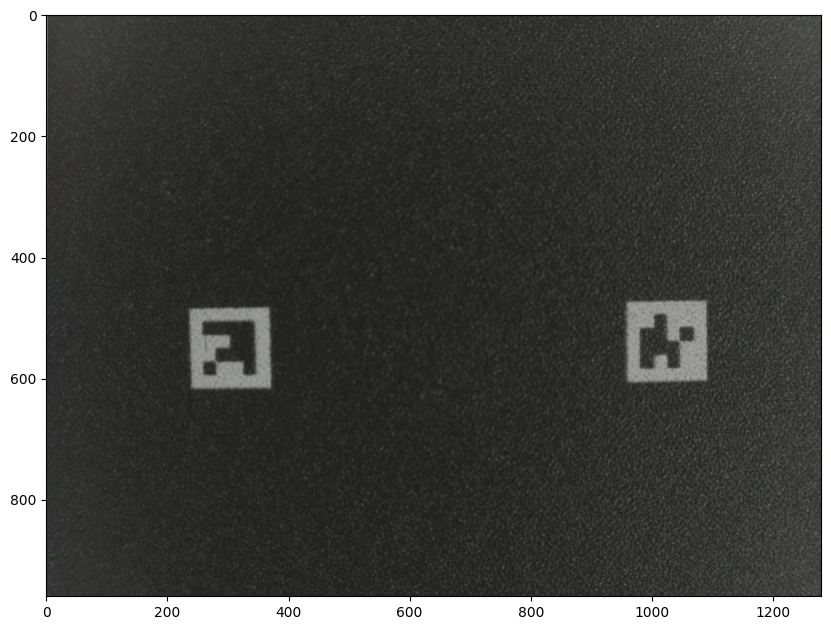

In [25]:
# use camera device

device = cv2.VideoCapture(0)
if not (device.isOpened()):
    print("Could not open the camera device")

device.set(cv2.CAP_PROP_FOURCC, cv2.VideoWriter_fourcc(*"MJPG"))
device.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
device.set(cv2.CAP_PROP_FRAME_HEIGHT, 960)
device.set(cv2.CAP_PROP_AUTO_EXPOSURE, -11)
device.set(cv2.CAP_PROP_AUTO_WB, 0)
success, raw = device.read()
if success is False:
    print("Cannot read data from camera device")
else :
    w  = int(device.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(device.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = device.get(cv2.CAP_PROP_FPS)
    frames = int(device.get(cv2.CAP_PROP_FRAME_COUNT))
    print("> high resolution video info : ({},{}@{}), {} frames".format(w, h, fps, frames))

device.release()

plt.figure(figsize=(10, 10))
plt.cla()
plt.imshow(raw)
plt.show()

[array([[[380.82892, 615.5863 ],
        [250.45425, 612.9668 ],
        [248.26283, 487.414  ],
        [379.78995, 484.20062]]], dtype=float32), array([[[1084.4132 ,  604.22107],
        [ 954.6486 ,  603.42303],
        [ 951.8863 ,  479.26538],
        [1083.5673 ,  472.65634]]], dtype=float32)]
Euler Angle :  [32] -15.262101274310016 8.061138109551363 -177.8086925914873
Euler Angle :  [31] -15.74049997276449 -8.69831562307134 176.33371203967457


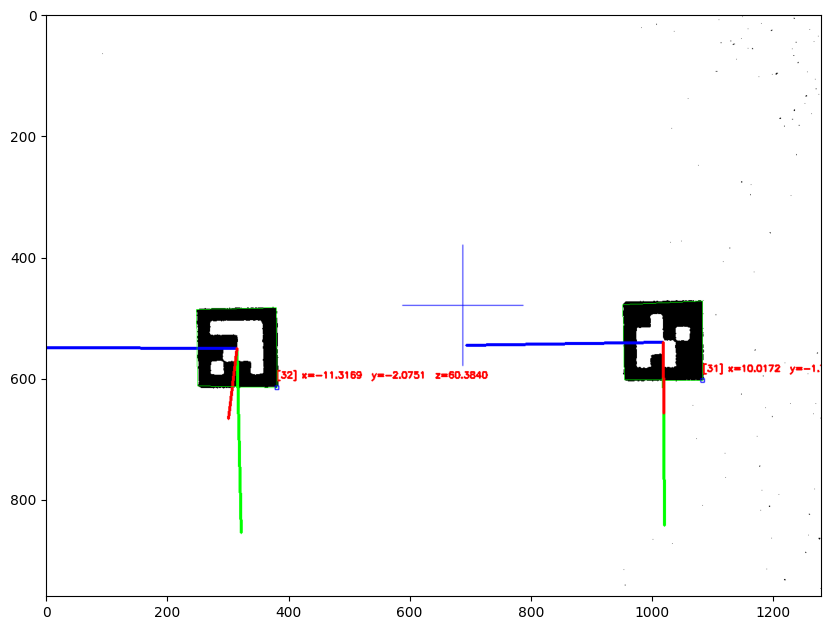

In [42]:
import math

# Checks if a matrix is a valid rotation matrix.
def isRotationMatrix(R):
    Rt = np.transpose(R)
    shouldBeIdentity = np.dot(Rt, R)
    I = np.identity(3, dtype=R.dtype)
    n = np.linalg.norm(I - shouldBeIdentity)
    return n < 1e-6

# Calculates rotation matrix to euler angles
def rotationMatrixToEulerAngles(R):
    assert (isRotationMatrix(R))

    sy = math.sqrt(R[0, 0] * R[0, 0] + R[1, 0] * R[1, 0])

    singular = sy < 1e-6

    if not singular:
        x = math.atan2(R[2, 1], R[2, 2])
        y = math.atan2(-R[2, 0], sy)
        z = math.atan2(R[1, 0], R[0, 0])
    else:
        x = math.atan2(-R[1, 2], R[1, 1])
        y = math.atan2(-R[2, 0], sy)
        z = 0

    return np.array([x, y, z])

# undistort image
newcameramtx, roi_high = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 0, (w,h))
raw_undist = cv2.undistort(raw, mtx, dist, None, newcameramtx)


# marker detection preparation
markerdict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_250)
markerparams = cv2.aruco.DetectorParameters_create()
markerparams.cornerRefinementMethod = cv2.aruco.CORNER_REFINE_SUBPIX #marker detection refinement

# image preprocessing (color image to binary image)
gray = cv2.cvtColor(raw_undist, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)


# max_output_value = 255   # 출력 픽셀 강도의 최대값
# neighborhood_size = 99
# subtract_from_mean = 10
# binary = cv2.adaptiveThreshold(gray,
#                                        max_output_value,
#                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#                                        cv2.THRESH_BINARY,
#                                        neighborhood_size,
#                                        subtract_from_mean)

_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#binary = cv2.flip(binary, -1)

# post processing for visualization
result = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
result_h, result_w, result_c = result.shape

# marker detection
corners, ids, rejected = cv2.aruco.detectMarkers(binary, markerdict, parameters=markerparams)
print(corners)

R_flip  = np.zeros((3,3), dtype=np.float32)
R_flip[0,0] = 1.0
R_flip[1,1] = 1.0
R_flip[2,2] = -1.0

if len(corners)>0:
    markers_pos = cv2.aruco.estimatePoseSingleMarkers(corners, 0.04, newcameramtx, dist)
    

    for idx in range(0, len(ids)):
        # extract rotation vector & translation vector
        rvec, tvec = markers_pos[0][idx,0,:], markers_pos[1][idx,0,:]
        
        # draw corner point
        (topLeft, topRight, bottomRight, bottomLeft) = corners[idx].reshape((4,2))
        cv2.aruco.drawDetectedMarkers(result, corners, borderColor=(0,255,0)) 
        
        # draw marker coordinates
        cv2.aruco.drawAxis(result, newcameramtx, dist, rvec, tvec, 0.1)
        
        str_pos = "[%d] x=%4.4f  y=%4.4f  z=%4.4f"%(ids[idx], tvec[0]*100, -1*tvec[1]*100, tvec[2]*100)
        cv2.putText(result, str_pos,(int(topLeft[0]), int(topLeft[1]) - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        
        # calc rotation matrix
        theta = math.sqrt(math.pow(rvec[0],2)+math.pow(rvec[1],2)+math.pow(rvec[2],2))
        #print(theta)
        t = np.linalg.norm(rvec)
        #print(t)
        rv = t/rvec
        #print(rv)
        
        # print(math.degrees(theta))
        
        vec = (rvec[0]/theta, rvec[1]/theta, rvec[2]/theta)
        #print(vec)
        
        R = np.matrix(cv2.Rodrigues(rvec)[0])
        R = R.T
        #print(R)
        roll_marker, pitch_marker, yaw_marker = rotationMatrixToEulerAngles(R_flip*R)
        print("Euler Angle : ", ids[idx], math.degrees(roll_marker), math.degrees(pitch_marker), math.degrees(yaw_marker))

# show detected results
# if len(corners) > 3:
#     for i in range(0, len(ids)):
#         rvec, tvec, markerPoints = cv2.aruco.estimatePoseSingleMarkers(corners[i], 0.04, newcameramtx, dist)
        
#         # single marker position
#         _marker_x = tvec.reshape(-1)[0]*100 + WAFER_MARKER_MAP[ids.reshape(-1)[i]][0]
#         _marker_y = -1*tvec.reshape(-1)[1]*100 + WAFER_MARKER_MAP[ids.reshape(-1)[i]][1]
#         _marker_z = tvec.reshape(-1)[2]*100
        
#         _marker_coord = np.matrix([[1,0,0,_marker_x],[0,1,0,_marker_y],[0,0,1,_marker_z],[0,0,0,1]])
#         _marker_coord = _marker_coord*ORIGIN_CAM_MARKER_TM
#         #print(_marker_coord)
        
#         #print("{}\tX : {}\tY : {}\tZ : {}".format(ids[i], tvec.reshape(-1)[0]*100, tvec.reshape(-1)[1]*100, tvec.reshape(-1)[2]*100))
#         #print(rvec)
#         #print("{}\tX : {}\tY : {}\tZ : {}".format(ids[i], _marker_coord[0,3], _marker_coord[1,3], _marker_coord[2,3]))

#         (topLeft, topRight, bottomRight, bottomLeft) = corners[i].reshape((4,2))
#         topRight = (int(topRight[0]), int(topRight[1]))
#         bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
#         bottomLeft = (int(bottomLeft[0]), int(bottomLeft[1]))
#         topLeft = (int(topLeft[0]), int(topLeft[1]))

#         cX = int((topLeft[0] + bottomRight[0]) / 2.0)
#         cY = int((topLeft[1] + bottomRight[1]) / 2.0)
#         cv2.circle(result, (cX, cY), 4, (0, 0, 255), -1)

#         cv2.aruco.drawDetectedMarkers(result, corners) 
#         cv2.aruco.drawAxis(result, newcameramtx, dist, rvec, tvec, 0.01)
#         print(tvec[0])
#         str_pos = "x=%4.0f  y=%4.0f  z=%4.0f"%(tvec[0], tvec[1], tvec[2])
#         cv2.putText(result, str_pos,(topLeft[0], topLeft[1] - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
#         #cv2.putText(result, str(ids[i]),(topLeft[0], topLeft[1] - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        

# show
cv2.line(result, (int(newcameramtx[0,2])-100,int(newcameramtx[1,2])), (int(newcameramtx[0,2])+100,int(newcameramtx[1,2])), (0,0,255), 1, cv2.LINE_AA)
cv2.line(result, (int(newcameramtx[0,2]),int(newcameramtx[1,2])-100), (int(newcameramtx[0,2]),int(newcameramtx[1,2])+100), (0,0,255), 1, cv2.LINE_AA)


plt.figure(figsize=(10, 10))
plt.cla()
plt.imshow(result)
plt.show()



In [17]:
# coordinates transformation
ORIGIN_CAM1_TM = np.matrix([[1,0,0,CAM1_OFFSET[0]],[0,1,0,CAM1_OFFSET[1]],[0,0,1,CAM1_OFFSET[2]],[0,0,0,1]])
print(ORIGIN_CAM1_TM)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
